# Importacion del Dataset ( Dataset de Clintes de Bancos)

In [153]:
import kagglehub
import pandas as pd
import os
import zipfile

# Descargar la última versión del dataset
dataset_path = kagglehub.dataset_download("gauravtopre/bank-customer-churn-dataset")

# Extraer los archivos si están en formato ZIP
if dataset_path.endswith(".zip"):
    extract_path = dataset_path.replace(".zip", "")  # Ruta donde se extraerán los archivos
    with zipfile.ZipFile(dataset_path, "r") as zip_ref:
        zip_ref.extractall(extract_path)
    print("Archivos extraídos en:", extract_path)
else:
    extract_path = dataset_path

# Listar los archivos extraídos para encontrar el correcto
files = os.listdir(extract_path)
print("Archivos disponibles:", files)

# Cargar el archivo correcto en un DataFrame
for file in files:
    if file.endswith(".csv"):  # Buscar un archivo CSV
        file_path = os.path.join(extract_path, file)
        df = pd.read_csv(file_path)
        df.head()
        break
else:
    print("No se encontró un archivo CSV en la carpeta extraída.")

Archivos disponibles: ['Bank Customer Churn Prediction.csv']


In [138]:
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Descripcion de las Columnas


In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


# Descripción de las Columnas del Dataset

A continuación, se describen las columnas presentes en el dataset utilizado para la predicción de churn en clientes bancarios:

1. **customer_id**: Identificador único del cliente. *(No se utiliza como entrada en el modelo).*

2. **credit_score**: Puntuación de crédito del cliente. *(Utilizado como entrada en el modelo).*

3. **country**: País de residencia del cliente. *(Utilizado como entrada en el modelo).*

4. **gender**: Género del cliente. *(Utilizado como entrada en el modelo).*

5. **age**: Edad del cliente. *(Utilizado como entrada en el modelo).*

6. **tenure**: Tiempo (en años) que el cliente ha sido miembro activo del banco. *(Utilizado como entrada en el modelo).*

7. **balance**: Saldo actual del cliente en su cuenta bancaria. *(Utilizado como entrada en el modelo).*

8. **products_number**: Número de productos contratados por el cliente en el banco. *(Utilizado como entrada en el modelo).*

9. **credit_card**: Indica si el cliente tiene una tarjeta de crédito con el banco (1 = Sí, 0 = No). *(Utilizado como entrada en el modelo).*

10. **active_member**: Indica si el cliente es un miembro activo del banco (1 = Sí, 0 = No). *(Utilizado como entrada en el modelo).*

11. **estimated_salary**: Salario estimado del cliente. *(Utilizado como entrada en el modelo).*

12. **churn**: Variable objetivo que indica si el cliente ha abandonado el banco durante un período determinado (1 = Sí, 0 = No). *(Utilizado como la variable de salida del modelo).*

## Eliminar columnas innecesarias

In [140]:
# Eliminar columnas innecesarias
Data_Model= df.drop(columns="customer_id")
Data_Model.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Codificacion Variables Categoricas

   country  estimated_salary  Order
0    Spain      99440.572281      0
1   France      99899.180814      1
2  Germany     101113.435102      2


C:\Users\SANTI\AppData\Local\Temp\ipykernel_3788\3256811864.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="country", y="estimated_salary", data=Data_Country,color=colors[0],palette="viridis")


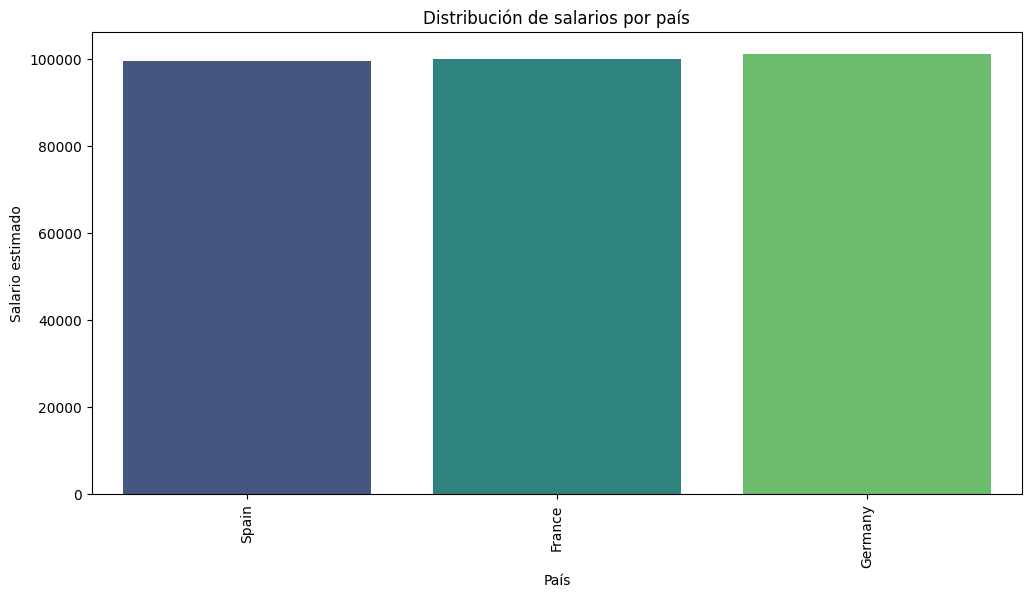

In [141]:
# Visualizar la distribucion promedio de salarios de paises para su codificacion

import matplotlib.pyplot as plt
import seaborn as sns

Data_Country= Data_Model.groupby("country")["estimated_salary"].mean().reset_index()
Data_Country= Data_Country.sort_values("estimated_salary", ascending=True,ignore_index=True)
Data_Country["Order"]= Data_Country.index
print(Data_Country.head())

# Visualizar la distribucion de salarios por pais
plt.figure(figsize=(12,6))
colors= sns.color_palette("husl", 10)
sns.barplot(x="country", y="estimated_salary", data=Data_Country,color=colors[0],palette="viridis")
plt.title("Distribución de salarios por país")
plt.ylabel("Salario estimado")
plt.xlabel("País")
plt.xticks(rotation=90)
plt.show()


In [142]:
# Codificar la columna "country" con el promedio de salario de cada país
Dict_Country = Data_Country.set_index("country")["Order"].to_dict()
print(Dict_Country)

# Reemplazar los valores de la columna "country" por su codificación
Data_Model["country"]= Data_Model["country"].map(Dict_Country)
Data_Model.head()


{'Spain': 0, 'France': 1, 'Germany': 2}


,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,1,Female,42,2,0.00,1,1,1,101348.88,1
1,608,0,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,1,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,1,Female,39,1,0.00,2,0,0,93826.63,0
4,850,0,Female,43,2,125510.82,1,1,1,79084.10,0


C:\Users\SANTI\AppData\Local\Temp\ipykernel_3788\1885614891.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="gender", y="estimated_salary", data=Data_Gender,color=colors[0],palette="viridis")


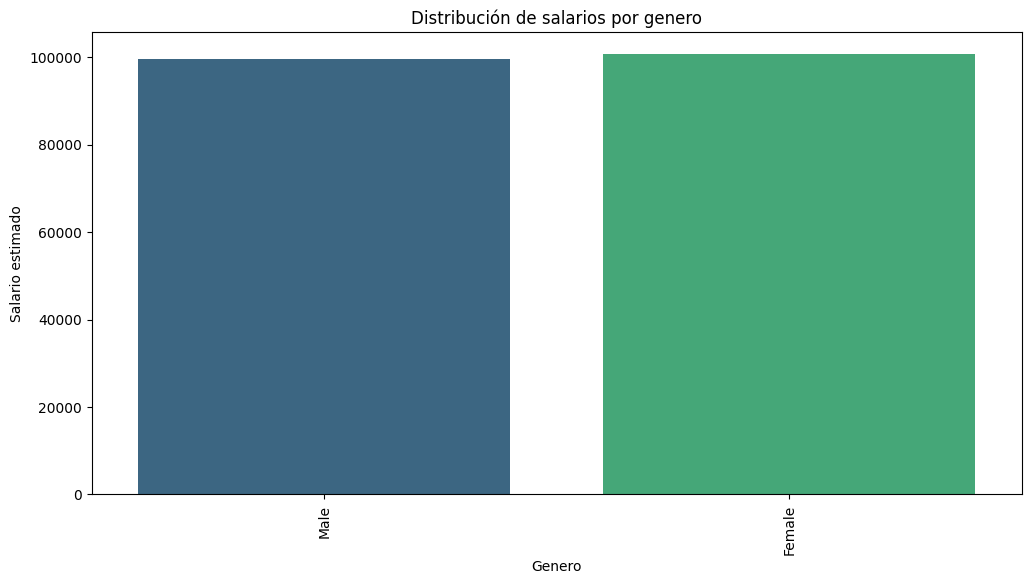

,gender,estimated_salary,Order
0,Male,99664.576931,0
1,Female,100601.541382,1


In [143]:
## Visualizar la distribucion de salarios por genero

Data_Gender=Data_Model.groupby("gender")["estimated_salary"].mean().reset_index()
Data_Gender=Data_Gender.sort_values("estimated_salary", ascending=True,ignore_index=True)
Data_Gender["Order"]=Data_Gender.index

plt.figure(figsize=(12,6))
colors= sns.color_palette("husl", 10)
sns.barplot(x="gender", y="estimated_salary", data=Data_Gender,color=colors[0],palette="viridis")
plt.title("Distribución de salarios por genero")
plt.ylabel("Salario estimado")
plt.xlabel("Genero")
plt.xticks(rotation=90)
plt.show()
Data_Gender.head()


In [144]:
# Codificar la columna "country" con el promedio de salario de cada país
Dict_Gender = Data_Gender.set_index("gender")["Order"].to_dict()
print(Dict_Gender)

# Codificar la variable gender en el dataset original
Data_Model["gender"]=Data_Model["gender"].map(Dict_Gender)
Data_Model.head()

{'Male': 0, 'Female': 1}


,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,1,1,42,2,0.00,1,1,1,101348.88,1
1,608,0,1,41,1,83807.86,1,0,1,112542.58,0
2,502,1,1,42,8,159660.80,3,1,0,113931.57,1
3,699,1,1,39,1,0.00,2,0,0,93826.63,0
4,850,0,1,43,2,125510.82,1,1,1,79084.10,0


## Visualizacion de las distribucciones

In [145]:
Data_Model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   credit_score      10000 non-null  int64  
 1   country           10000 non-null  int64  
 2   gender            10000 non-null  int64  
 3   age               10000 non-null  int64  
 4   tenure            10000 non-null  int64  
 5   balance           10000 non-null  float64
 6   products_number   10000 non-null  int64  
 7   credit_card       10000 non-null  int64  
 8   active_member     10000 non-null  int64  
 9   estimated_salary  10000 non-null  float64
 10  churn             10000 non-null  int64  
dtypes: float64(2), int64(9)
memory usage: 859.5 KB


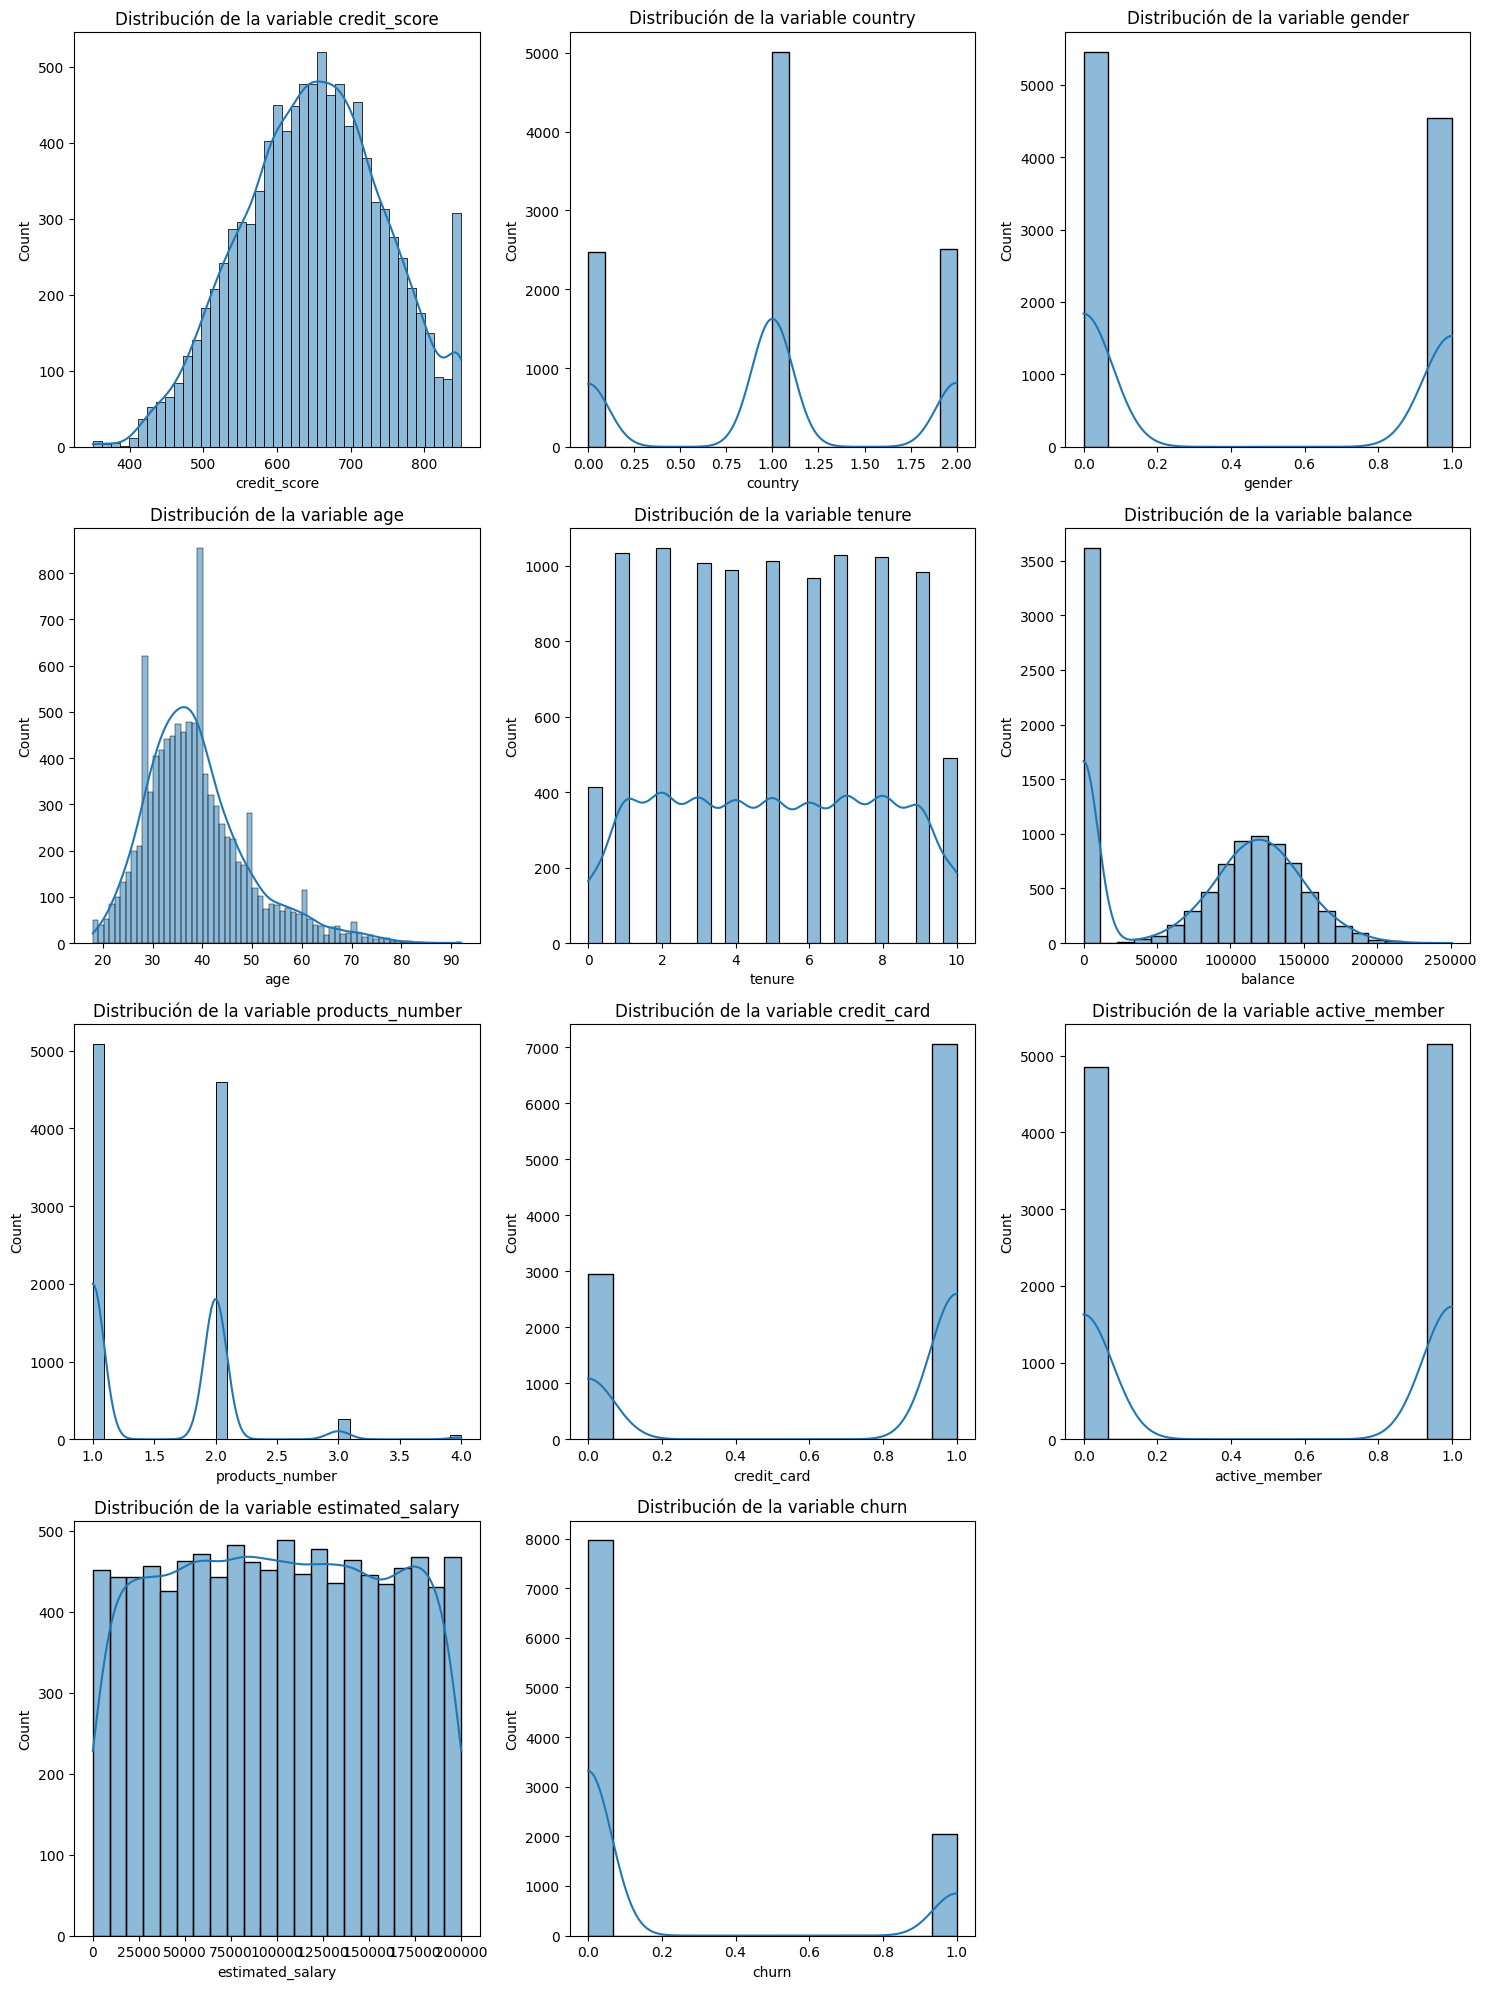

In [146]:
import math
import random

# Obtener los nombres de las columnas
Colums_name = Data_Model.columns.values

# Calcular el número de filas y columnas para los subplots
num_columns = 3  # Número de gráficos por fila
num_rows = math.ceil(len(Colums_name) / num_columns)  # Número de filas necesarias

# Crear la figura y los subplots
fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, 5 * num_rows))
axes = axes.flatten()  # Aplanar la matriz de ejes para iterar fácilmente

# Generar un histograma para cada columna
for idx, col in enumerate(Colums_name):
    sns.histplot(Data_Model[col], kde=True, ax=axes[idx])
    axes[idx].set_title("Distribución de la variable " + col)

# Eliminar subplots vacíos si hay más subplots que columnas
for i in range(len(Colums_name), len(axes)):
    fig.delaxes(axes[i])

# Ajustar el diseño
plt.tight_layout()
plt.show()

C:\Users\SANTI\AppData\Local\Temp\ipykernel_3788\498828532.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=Data_Model[col], ax=axes[idx],palette=random.choice(Colors))
C:\Users\SANTI\AppData\Local\Temp\ipykernel_3788\498828532.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=Data_Model[col], ax=axes[idx],palette=random.choice(Colors))
C:\Users\SANTI\AppData\Local\Temp\ipykernel_3788\498828532.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=Data_Model[col], ax=axes[idx],palette=random.choice(Colors))
C:\Users\SANTI\AppData\Lo

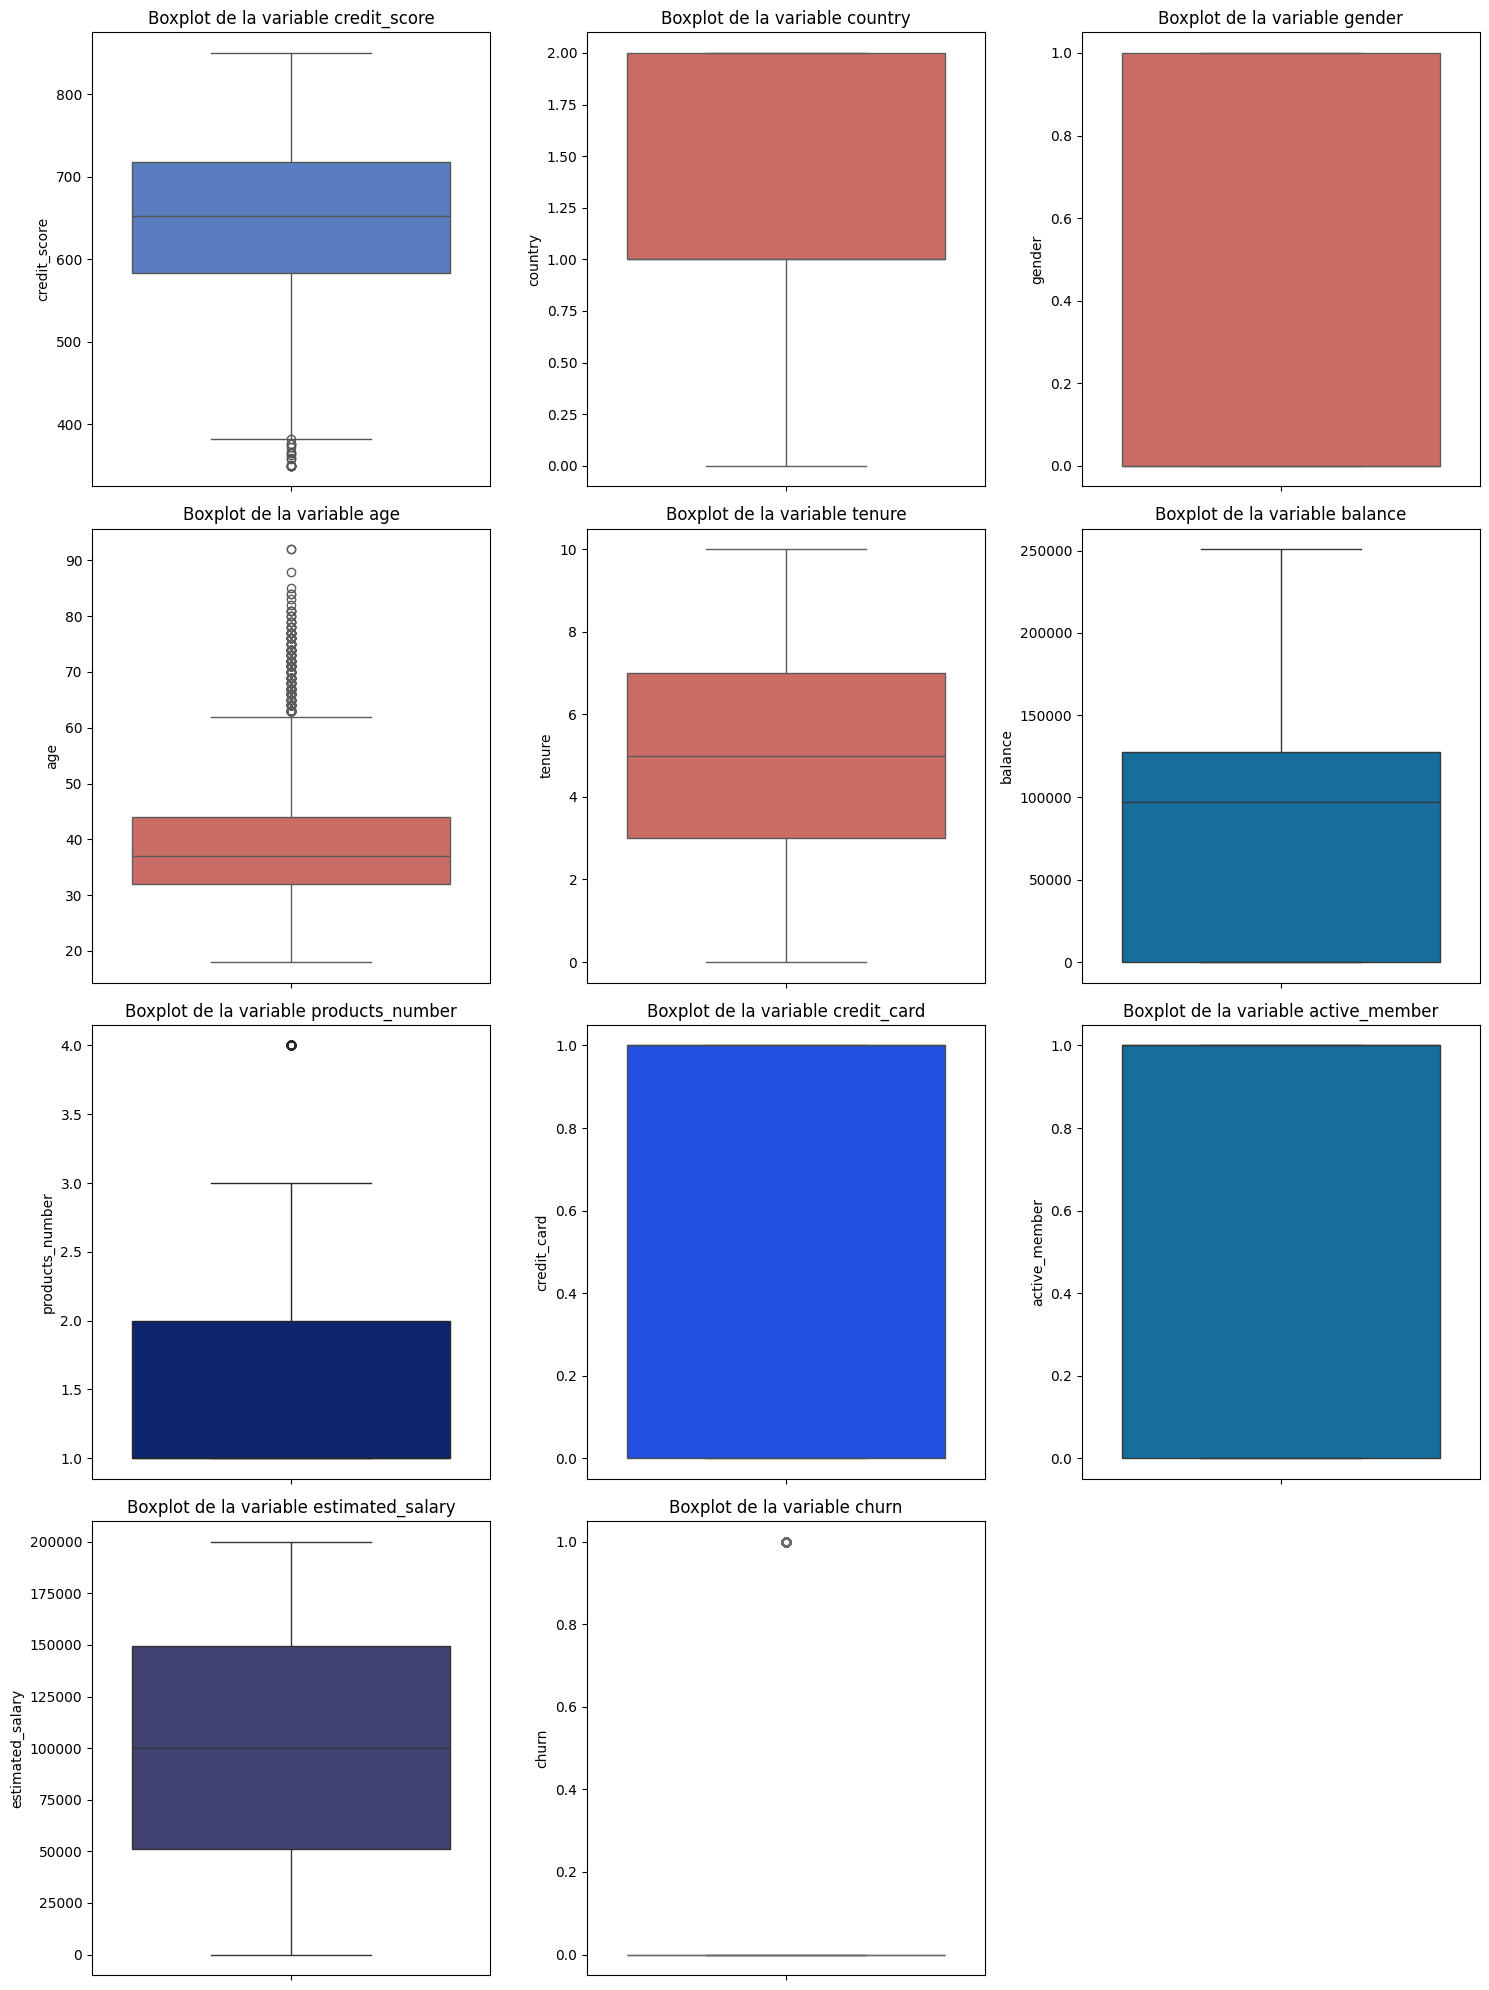

In [147]:
# Crear la figura y los subplots
fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, 5 * num_rows))
axes = axes.flatten()  # Aplanar la matriz de ejes para iterar fácilmente

# Generar un boxplot para cada columna
Colors=['bright','deep','colorblind','muted','pastel','dark','hls','husl','tab10','tab20','tab20b','tab20c']
for idx, col in enumerate(Colums_name):
    sns.boxplot(y=Data_Model[col], ax=axes[idx],palette=random.choice(Colors))
    axes[idx].set_title("Boxplot de la variable " + col)

# Eliminar subplots vacíos si hay más subplots que columnas
for i in range(len(Colums_name), len(axes)):
    fig.delaxes(axes[i])

# Ajustar el diseño
plt.tight_layout()
plt.show()

## Visualizacion de la correlacion entre Variables

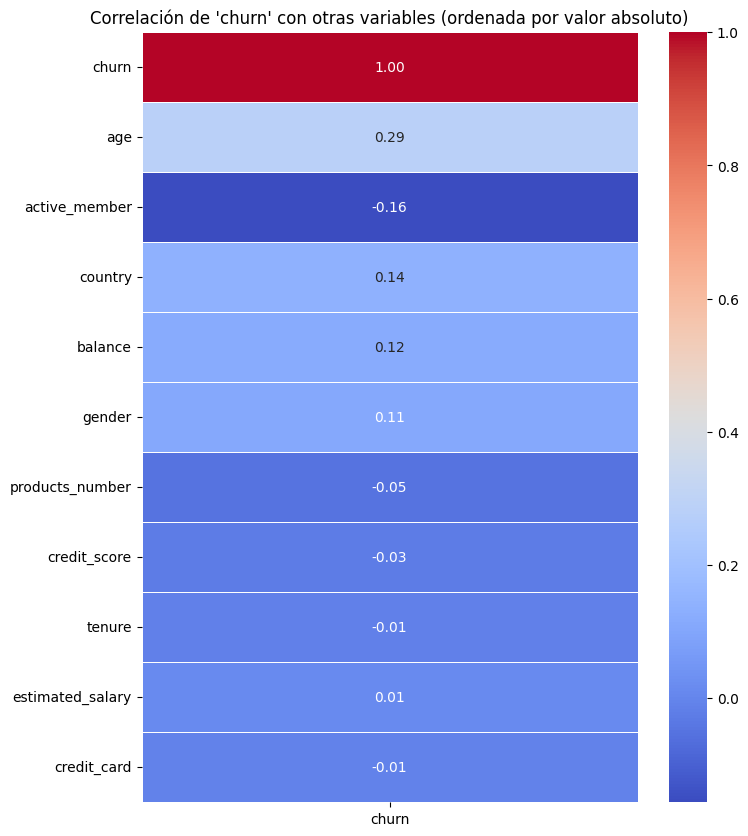

In [148]:
import numpy as np

# Calcular la matriz de correlación
corr = Data_Model.corr()

# Ordenar las variables por el valor absoluto de su correlación con "churn"
corr_churn = corr[["churn"]].reindex(corr["churn"].abs().sort_values(ascending=False).index)

# Configurar el tamaño de la figura
plt.figure(figsize=(8, 10))

# Dibujar el mapa de calor para "churn"
sns.heatmap(corr_churn, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, cbar=True)

# Título del gráfico
plt.title("Correlación de 'churn' con otras variables (ordenada por valor absoluto)")
plt.show()

Vemos que las variables que menos se relacionan con el modelo son credit card, estimated salary y trenure , podrian ser candidatos a ser eliminados para el entrenamiento del modelo.


In [149]:
# Eliminar variables menos relevantes
#Data_Model= Data_Model.drop(columns=["credit_card","estimated_salary","tenure"])
Data_Model.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,1,1,42,2,0.00,1,1,1,101348.88,1
1,608,0,1,41,1,83807.86,1,0,1,112542.58,0
2,502,1,1,42,8,159660.80,3,1,0,113931.57,1
3,699,1,1,39,1,0.00,2,0,0,93826.63,0
4,850,0,1,43,2,125510.82,1,1,1,79084.10,0


## Normalizacion de variables para entrenar el modelo

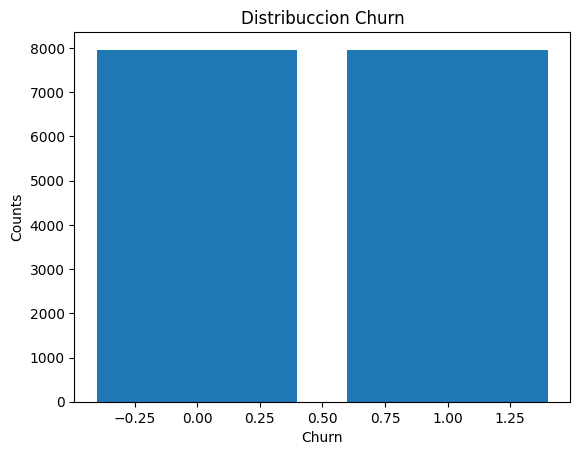

In [150]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# Dividir el dataset en variables dependientes e independientes

X = Data_Model.drop(columns="churn")
y = Data_Model["churn"]
#Aplicar SMOTE para balancear las clases
resampler = SMOTE()
X,y = resampler.fit_resample(X,y)

plt.bar(y.value_counts().index , y.value_counts().values)
plt.title('Distribuccion Churn')
plt.xlabel('Churn')
plt.ylabel('Counts')
plt.show()

# Dividir el dataset en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar las variables independientes
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, f1_score, recall_score, precision_score, accuracy_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Definir los hiperparámetros a probar
param_grid = {
    "n_estimators": [100, 200, 300],      
    "max_depth": [10, 15, 20, None],      
    "max_features": ["sqrt", "log2"],     
    "bootstrap": [True, False]            
}

# Inicializar el modelo base
rf = RFC(random_state=42, n_jobs=-1)

# Configurar GridSearchCV
grid_search = GridSearchCV(
    estimator=rf, param_grid=param_grid, 
    scoring="f1",  # Se optimiza la métrica F1
    cv=5,          # Validación cruzada de 5 folds
    verbose=2,     # Muestra el progreso
    n_jobs=-1      # Usa todos los núcleos disponibles
)

# Entrenar el modelo con búsqueda de hiperparámetros
grid_search.fit(X_train, y_train)

# Obtener el mejor modelo encontrado
best_rf = grid_search.best_estimator_

# Realizar predicciones
y_pred = best_rf.predict(X_test)

# Mostrar los mejores hiperparámetros encontrados
print("\nMejores hiperparámetros encontrados:")
print(grid_search.best_params_)

# Mostrar métricas de evaluación
print("\nMatriz de confusión:")
print(confusion_matrix(y_test, y_pred))
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))
print("\nExactitud:", accuracy_score(y_test, y_pred))
print("Precisión:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))

# Visualizar la matriz de confusión
plt.figure(figsize=(6, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

# Adjuntar resultados en un dataframe para comparar
Results = pd.DataFrame({
    "Model": ["Random Forest (GridSearch)"],
    "Accuracy": [accuracy_score(y_test, y_pred)],
    "Precision": [precision_score(y_test, y_pred)],
    "Recall": [recall_score(y_test, y_pred)],
    "F1": [f1_score(y_test, y_pred)]
})

print(Results)


Fitting 5 folds for each of 48 candidates, totalling 240 fits


## XGB Classifier

Matriz de confusión:
[[1392  241]
 [ 220 1333]]

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.86      0.85      0.86      1633
           1       0.85      0.86      0.85      1553

    accuracy                           0.86      3186
   macro avg       0.86      0.86      0.86      3186
weighted avg       0.86      0.86      0.86      3186


Exactitud: 0.8553044569993723
Precisión: 0.8468869123252859
Recall: 0.8583386992916935
F1: 0.8525743524144548


,Model,Accuracy,Precision,Recall,F1
0,Random Forest Classifier,0.852480,0.848232,0.849324,0.848777
1,XGBoost Classifier,0.855304,0.846887,0.858339,0.852574


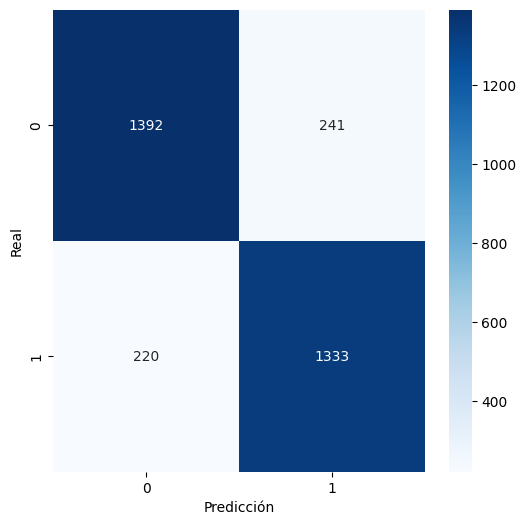

In [152]:
from xgboost import XGBClassifier


# Crear y entrenar el modelo de regresión 
model = XGBClassifier()
model.fit(X_train, y_train)

# Realizar predicciones
y_pred = model.predict(X_test)

# Calcular métricas de evaluación
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))
print("\nExactitud:", accuracy_score(y_test, y_pred))
print("Precisión:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))

# Visualizar la matriz de confusion
plt.figure(figsize=(6, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicción")
plt.ylabel("Real")

# Adjuntar resultados en un dataframe para comparar
XGB_results = pd.DataFrame({
    "Model": ["XGBoost Classifier"],
    "Accuracy": [accuracy_score(y_test, y_pred)],
    "Precision": [precision_score(y_test, y_pred)],
    "Recall": [recall_score(y_test, y_pred)],
    "F1": [f1_score(y_test, y_pred)]
})

Results = pd.concat([Results, XGB_results], ignore_index=True)

Results.head()